# Machine learning project

**Objective** Exploit the dataset of Latest_Data_Science_Salaries to predict the salarie of datascientist engineers

### Load python librarie

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import os
import pickle

### Load the dataset

In [2]:
salaries=pd.read_csv('../datasets/v5_Latest_Data_Science_Salaries.csv')
salaries

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Staff Data Analyst,Contract,Entry,Junior,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,Junior,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,Expert,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,Expert,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,Expert,140100,United States Dollar,United States,140100,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3946,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3947,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3948,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3949,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [3]:
salaries.info()
salaries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3951 non-null   object
 1   Employment Type     3951 non-null   object
 2   Experience Level    3951 non-null   object
 3   Expertise Level     3951 non-null   object
 4   Salary              3951 non-null   int64 
 5   Salary Currency     3951 non-null   object
 6   Company Location    3951 non-null   object
 7   Salary in USD       3951 non-null   int64 
 8   Employee Residence  3951 non-null   object
 9   Company Size        3951 non-null   object
 10  Year                3951 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 339.7+ KB


,Salary,Salary in USD,Year
count,3.951000e+03,3951.000000,3951.000000
mean,1.982900e+05,142753.106808,2022.576816
std,6.725310e+05,68281.388301,0.682222
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,92280.000000,2022.000000
50%,1.400000e+05,136600.000000,2023.000000
75%,1.898750e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [4]:
salaries.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

## 1. Visualization Phase

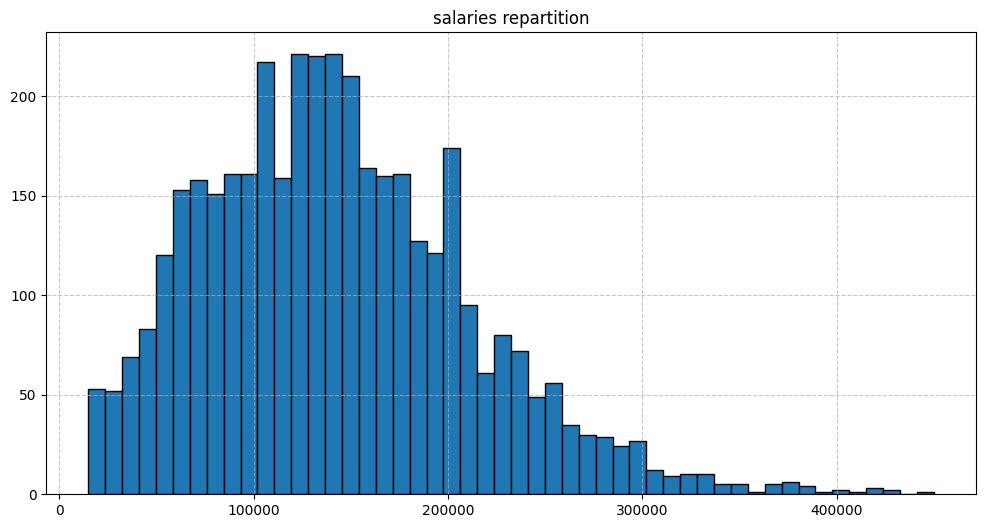

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(salaries['Salary in USD'], bins=50, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title("salaries repartition")
plt.savefig('../illustrations/salries_histogram.png')

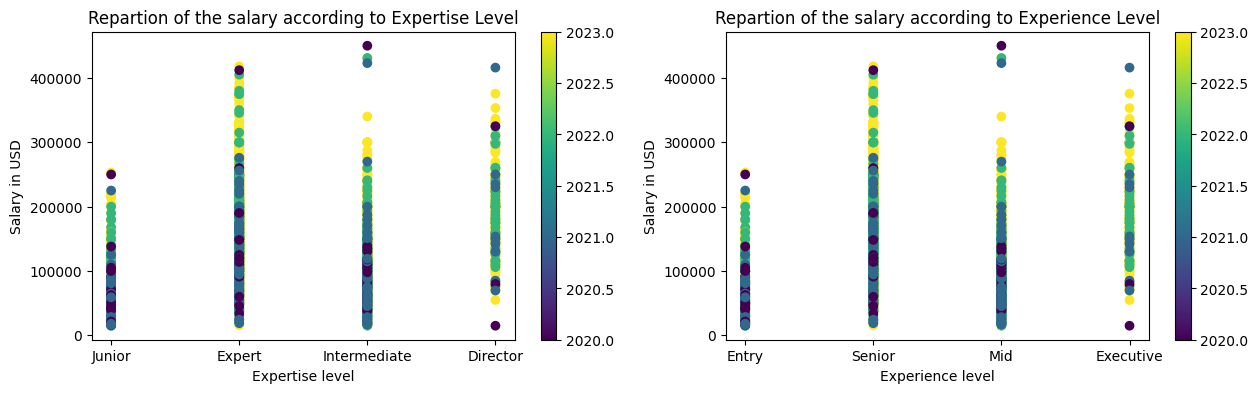

In [6]:
x1=salaries['Expertise Level']
x2=salaries['Experience Level']
y=salaries['Salary in USD']
c=salaries['Year']
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.scatter(x1, y, c=c)
plt.title("Repartion of the salary according to Expertise Level")
plt.colorbar()
plt.xlabel("Expertise level")
plt.ylabel("Salary in USD")
plt.subplot(1, 2, 2)
plt.scatter(x2, y, c=c)
plt.title("Repartion of the salary according to Experience Level")
plt.colorbar()
plt.xlabel("Experience level")
plt.ylabel("Salary in USD")
plt.savefig('../illustrations/salary_expertise_experience.png')

the number of jobs (11,)


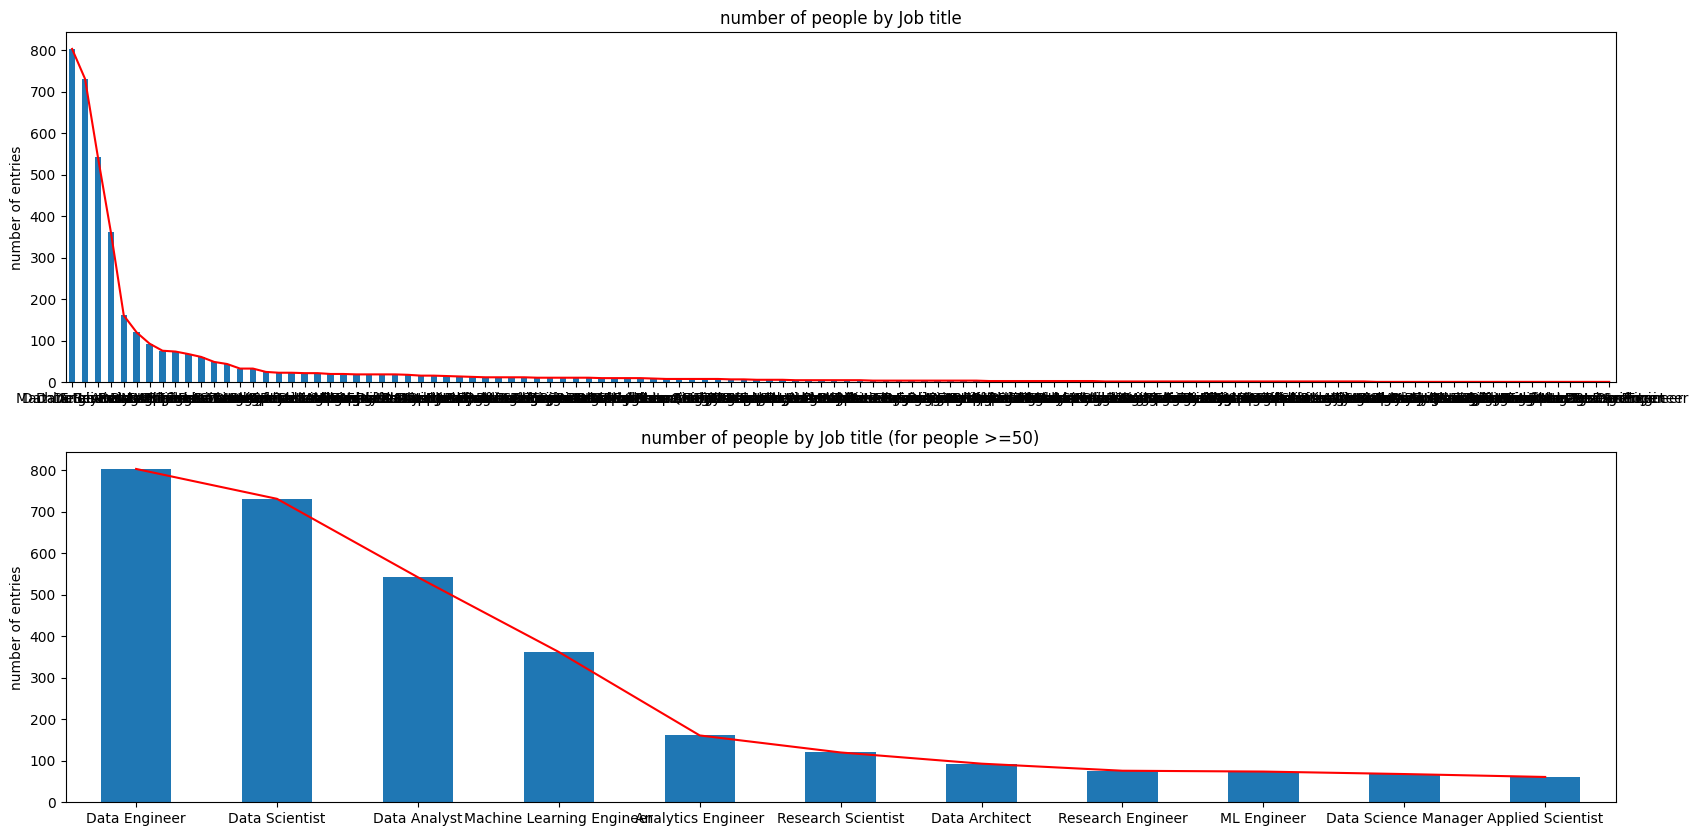

In [7]:
plt.figure(figsize=(20, 10))
s=salaries['Job Title'].value_counts()
# s[s>=20].plot.bar()
print(f"the number of jobs {s[s>=50].shape}")
plt.subplot(2,1,1)
s.plot.bar()
s.plot.line(c='red')
plt.title("number of people by Job title")
plt.ylabel("number of entries")
plt.subplot(2,1,2)
s[s>=50].plot.bar()
s[s>=50].plot.line(c='red')
plt.title("number of people by Job title (for people >=50)")
plt.ylabel("number of entries")
plt.savefig('../illustrations/job_title.png')

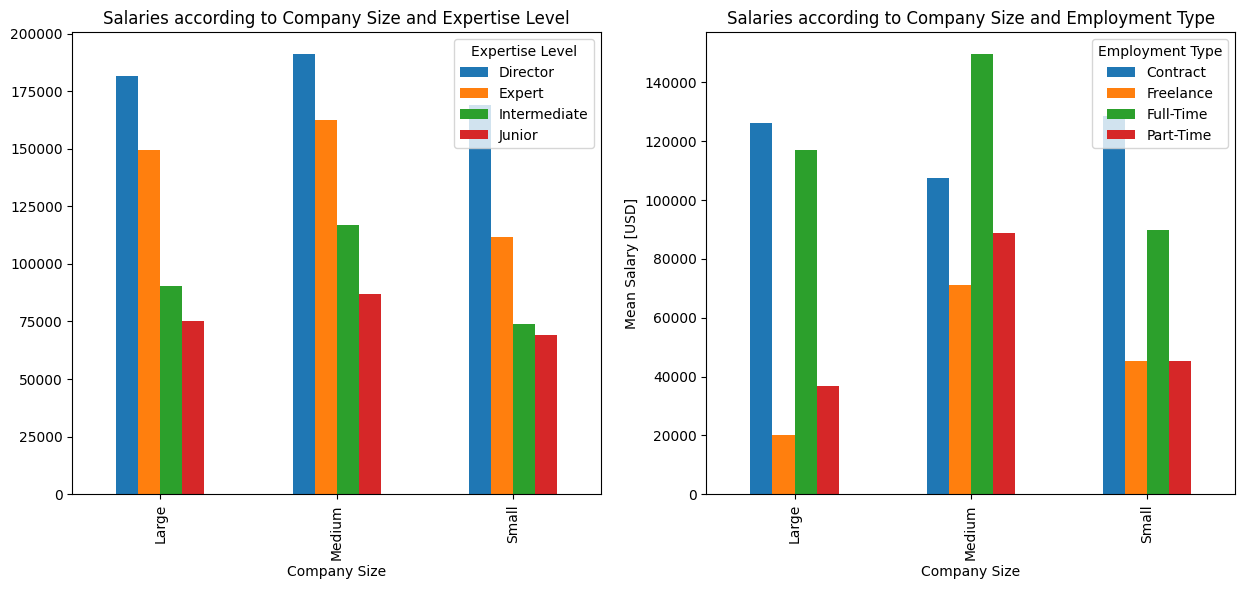

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
title="Salaries according to Company Size and Expertise Level"
salaries.groupby(['Company Size', 'Expertise Level'])['Salary in USD'].mean().unstack().plot.bar(ax=axes[0], title=title)
# plt.title("plot of the mean salary of data scientist according to the size of the company")
plt.xlabel("Company Size")
plt.ylabel("Mean Salary [USD]")
title="Salaries according to Company Size and Employment Type"
salaries.groupby(['Company Size', 'Employment Type'])['Salary in USD'].mean().unstack().plot.bar(ax=axes[1], title=title)
# plt.title("plot of the mean salary of data scientist according to the size of the company")
plt.xlabel("Company Size")
plt.ylabel("Mean Salary [USD]")
plt.savefig('../illustrations/salries_compay_expertise_employment.png')

## 2. Transformation Phase

### Cleaning the dataset

In [9]:
final_salaries=salaries[salaries['Company Location']=='United States']
final_salaries=salaries[salaries['Employment Type']=='Full-Time']
final_salaries.shape

(3909, 11)

### Selecting meaningful features

In [10]:
data=final_salaries.drop([c for c in salaries if c not in ['Experience Level', 'Expertise Level', 'Salary in USD', 'Company Size', 'Job Title']], axis=1)
data

,Job Title,Experience Level,Expertise Level,Salary in USD,Company Size
1,AI Engineer,Entry,Junior,35000,Medium
2,AI Developer,Senior,Expert,53984,Small
3,Machine Learning Engineer,Senior,Expert,226600,Medium
4,Machine Learning Engineer,Senior,Expert,140100,Medium
5,Machine Learning Scientist,Senior,Expert,204500,Medium
...,...,...,...,...,...
3945,Data Specialist,Senior,Expert,165000,Large
3946,Data Scientist,Senior,Expert,412000,Large
3947,Principal Data Scientist,Mid,Intermediate,151000,Large
3948,Data Scientist,Entry,Junior,105000,Small


### Numerising features

In [11]:
data['Expertise Level'].replace(['Director', 'Expert', 'Intermediate', 'Junior'], [4, 3, 2, 1], inplace=True)
# data['Expertise Level'].value_counts().plot.bar()
data['Company Size'].replace(['Large', 'Medium', 'Small'], [7, 6, 5], inplace=True)
# data['Company Size'].value_counts().plot.bar()
data['Experience Level'].replace(['Executive', 'Senior', 'Mid', 'Entry'], [11, 10, 9, 8], inplace=True)
# data['Experience Level'].value_counts().plot.bar()

Examining the pair plot graph

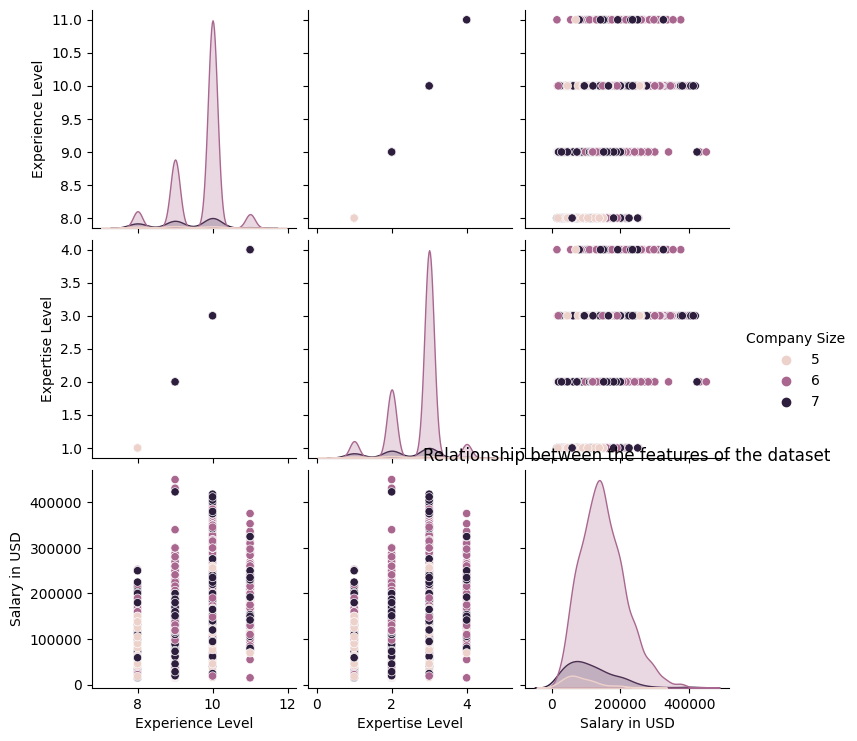

In [12]:
sb.pairplot(data, hue='Company Size')
plt.title("Relationship between the features of the dataset")
plt.savefig('../illustrations/pairplot.png')

### Examining The heatmap plot

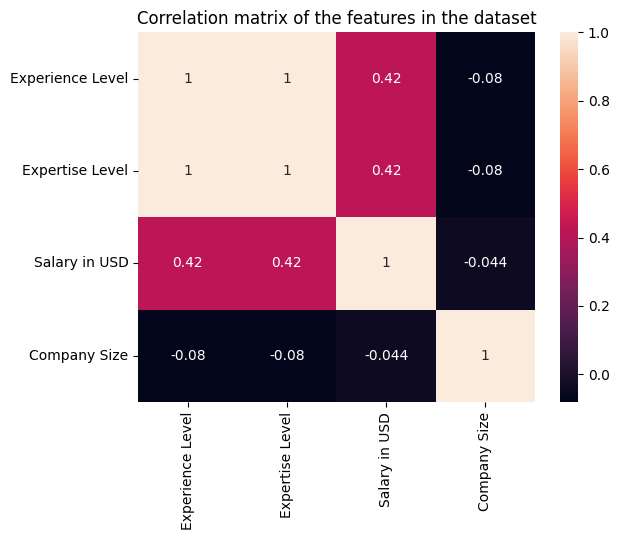

In [13]:
sb.heatmap(data.drop(['Job Title'], axis=1).corr(), annot=True)
plt.title("Correlation matrix of the features in the dataset")
plt.savefig('../illustrations/heatmap.png')

## 3. Creating the model

### Separate the dataset into data and target

In [14]:
X=data.drop(['Salary in USD', 'Job Title'], axis=1)
y=data['Salary in USD']

print(f"the shape of the data : {X.shape}, target {y.shape}")

the shape of the data : (3909, 3), target (3909,)


### Converting pandas dataframe into numpy arrays

In [15]:
X=np.array(X)
y=np.array(y)
X

array([[ 8,  1,  6],
       [10,  3,  5],
       [10,  3,  6],
       ...,
       [ 9,  2,  7],
       [ 8,  1,  5],
       [10,  3,  7]], dtype=int64)

### Splitting the data into train set and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)


print(f"the shape of the train set {X_train.shape}, {y_train.shape}")
print(f"the shape of the test set {X_test.shape}, {y_test.shape}")

the shape of the train set (3127, 3), (3127,)
the shape of the test set (782, 3), (782,)


### Visualising the train set and the test set

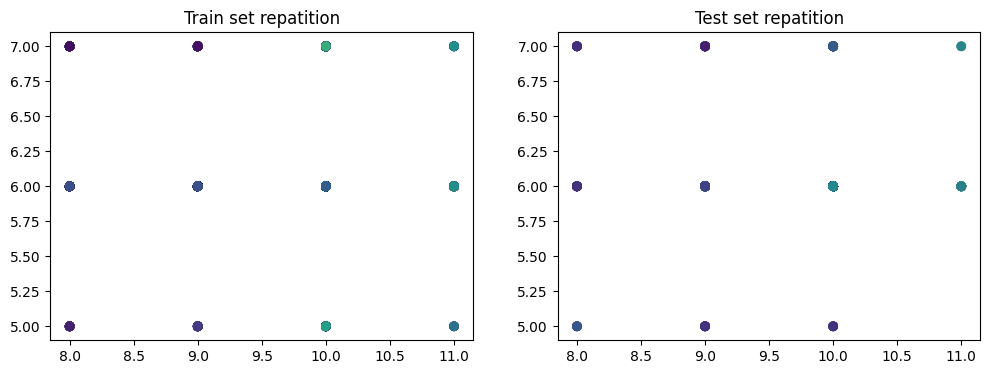

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 2], c=y_train, alpha=0.8)
plt.title("Train set repatition")
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test, alpha=0.8)
plt.title("Test set repatition")
plt.savefig('../illustrations/train_set_test_set_split.png')

### Select the baseline model to train

In [19]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

#### Evaluating initial performance of the model on the train set

In [20]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.19550477359238638

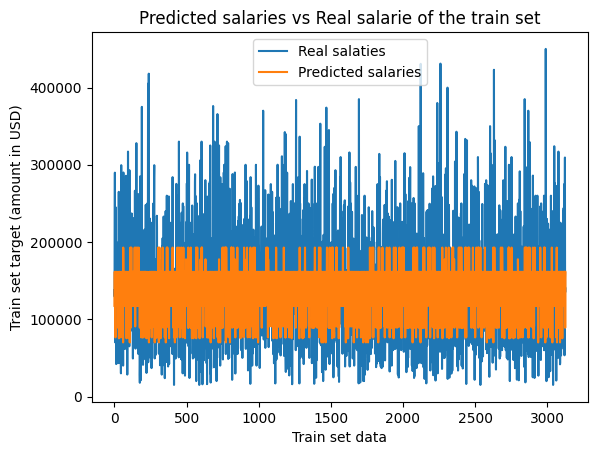

In [21]:
predictions=[]
for e in X_train :
    predictions.append(model.predict(e.reshape(1, 3))[0])
plt.plot(y_train, label="Real salaties")
plt.plot(predictions, label="Predicted salaries")
plt.title("Predicted salaries vs Real salarie of the train set")
plt.xlabel("Train set data")
plt.ylabel("Train set target (amount in USD)")
plt.legend()
plt.savefig('../illustrations/train_predicted_real_values.png')

In [22]:
backed_model=model

#### Spliting train set with KFold cross-validation

In [23]:
from sklearn.model_selection import cross_val_score

The mean error of the model 60834.50499622904


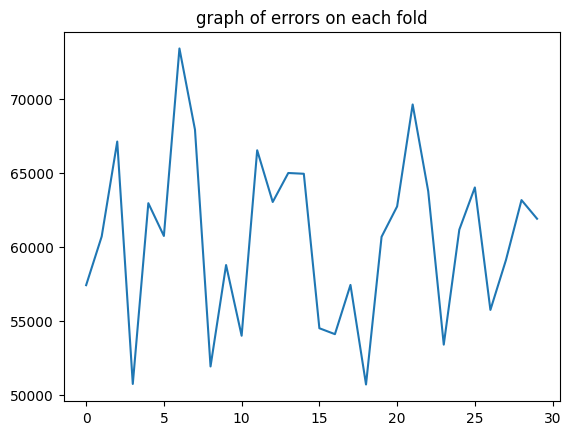

In [24]:
k_fold_score=cross_val_score(DecisionTreeRegressor(), X_train, y_train, scoring='neg_mean_squared_error', cv=30)
print(f"The mean error of the model {math.sqrt(-k_fold_score.mean())}")
sqrt_error=np.sqrt(-k_fold_score)
plt.plot(sqrt_error)
plt.title("graph of errors on each fold")
plt.savefig('../illustrations/kfold_errors_repartition.png')

#### Using validation_curve to tweark one parameter of the model

In [25]:
from sklearn.model_selection import validation_curve

In [26]:

param_range=['squared_error', 'friedman_mse', 'poisson', 'absolute_error']
train_score, validation_score=validation_curve(DecisionTreeRegressor(), X_train, y_train, param_name="criterion", param_range=param_range, scoring='neg_mean_squared_error', cv=30)
train_score, validation_score=np.sqrt(-train_score), np.sqrt(-validation_score)
print("train scores", train_score.shape, train_score.mean(axis=1))
print("validation scores",validation_score.shape, validation_score.mean(axis=1))
print(f"the best mean error is {np.array(validation_score.mean(axis=1)).min()} and the best score (on a k-fold) is {validation_score.min()}")

train scores (4, 30) [60600.9513867  60600.9513867  60600.9513867  61193.47273921]
validation scores (4, 30) [60573.40130026 60573.40130026 60573.40130026 61160.01647312]
the best mean error is 60573.40130026464 and the best score (on a k-fold) is 49337.238580556594


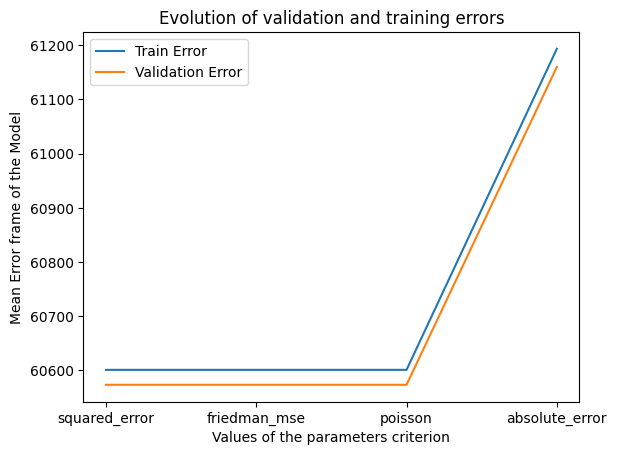

In [27]:
plt.plot(['squared_error', 'friedman_mse', 'poisson', 'absolute_error'], train_score.mean(axis=1), label="Train Error")
plt.plot(['squared_error', 'friedman_mse', 'poisson', 'absolute_error'], validation_score.mean(axis=1), label="Validation Error")
plt.title("Evolution of validation and training errors")
plt.xlabel('Values of the parameters criterion')
plt.ylabel('Mean Error frame of the Model')
plt.legend()
plt.savefig('../illustrations/mean_error_evolution.png')

### Use GridSearchCV to find the best parameter to apply

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['absolute_error', 'squared_error', 'poisson', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [None, 42, 2022]
}
print(os.path.dirname(os.getcwd()))

if os.path.exists(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), "DecisionTreeRegressor.pkl")):
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'DecisionTreeRegressor.pkl'), 'rb') as training_model:
        model = pickle.load(training_model)
else:
    grid=GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=30)
    grid.fit(X_train, y_train)
    print(f"the best score {math.sqrt(-grid.best_score_)}")
    model=grid.best_estimator_
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'DecisionTreeRegressor.pkl'), 'wb') as picklefile:
        pickle.dump(model, picklefile)

c:\Users\donal\Documents\FrontEnd\salaries


In [41]:
model

DecisionTreeRegressor(max_features='auto')

In [42]:
model.score(X_test, y_test)

0.2113716936245369

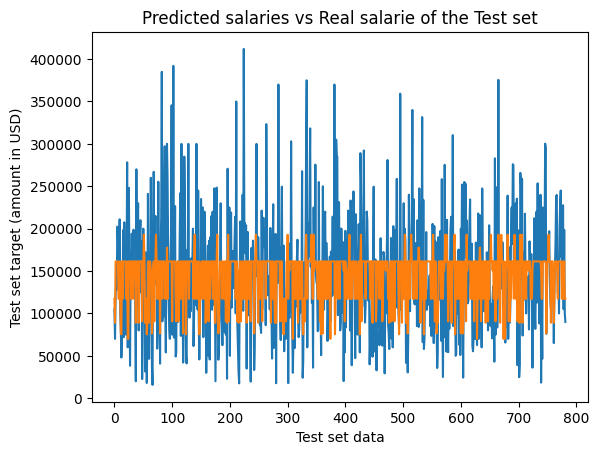

In [43]:
predictions=[]
for e in X_test :
    predictions.append(model.predict(e.reshape(1, 3))[0])
plt.plot(y_test)
plt.plot(predictions)

plt.title("Predicted salaries vs Real salarie of the Test set")
plt.xlabel("Test set data")
plt.ylabel("Test set target (amount in USD)")
plt.savefig('../illustrations/test_predicted_real_values.png')

#### use mean squared error to evaluate the precision of the model

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
error=mean_squared_error(y_test, model.predict(X_test))
# sb.heatmap(conf_matrix)
print(f"The mean squared error {math.sqrt(error)}")

The mean squared error 61138.661657450495


## Change the baseline

### Test a baseline with DecisionTreeRegressor

In [46]:
from sklearn.linear_model import LinearRegression

In [50]:
params_grid_linear={
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, 2, 3]
}
if os.path.exists(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), "LinearRegression.pkl")):
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'LinearRegression.pkl'), 'rb') as training_model:
        model_linear = pickle.load(training_model)
else:
    grid_linear=GridSearchCV(LinearRegression(), param_grid=params_grid_linear, cv=30)
    grid_linear.fit(X_train, y_train)
    print(f"The best score {grid_linear.best_score_}")
    model_linear=grid_linear.best_estimator_
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'LinearRegression.pkl'), 'wb') as picklefile:
        pickle.dump(model_linear, picklefile)

In [51]:
model_linear

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

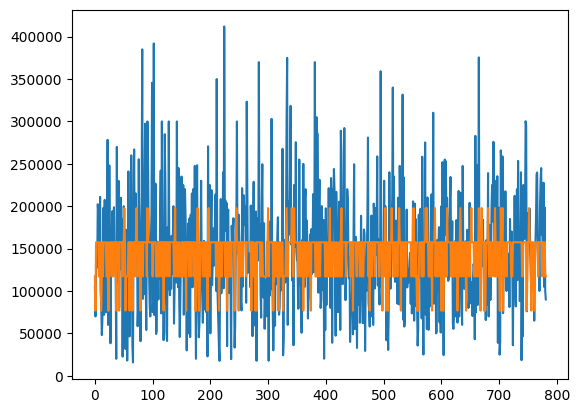

In [52]:
predictions_linear=[]
for e in X_test :
    predictions_linear.append(model_linear.predict(e.reshape(1, 3))[0])
plt.plot(y_test)
plt.plot(predictions_linear)

In [53]:
error_linear=mean_squared_error(y_test, model_linear.predict(X_test))
# sb.heatmap(conf_matrix)
print(f"The mean squared error {math.sqrt(error_linear)}")

The mean squared error 62288.71385214206


### Test a baseline with RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
param_grid_randomForest = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
if os.path.exists(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), "RandomForestRegressor.pkl")):
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'RandomForestRegressor.pkl'), 'rb') as training_model:
        model_random = pickle.load(training_model)
else:
    grid_random=GridSearchCV(RandomForestRegressor(), param_grid=param_grid_randomForest, cv=30)
    grid_random.fit(X_train, y_train)
    print(f"The best score {grid_random.best_score_}")
    model_random=grid_random.best_estimator_
    with open(os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'models'), 'RandomForestRegressor.pkl'), 'wb') as picklefile:
        pickle.dump(model_random, picklefile)

In [59]:
model_random

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=10,
                      n_estimators=50)

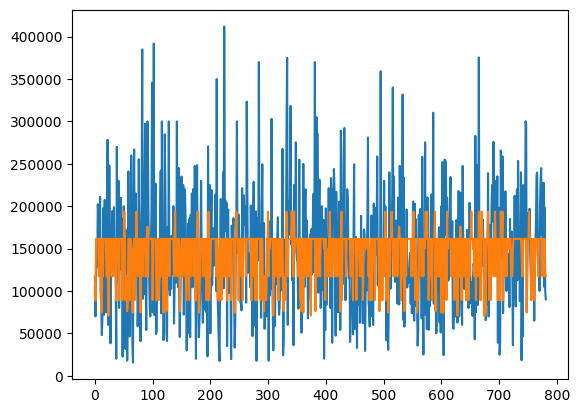

In [60]:
predictions_random=[]
for e in X_test :
    predictions_random.append(model_random.predict(e.reshape(1, 3))[0])
plt.plot(y_test)
plt.plot(predictions_random)

In [61]:
error_random=mean_squared_error(y_test, model_random.predict(X_test))
# sb.heatmap(conf_matrix)
print(f"The mean squared error {math.sqrt(error_random)}")

The mean squared error 61132.73033894782


## 4. Does collectiong more data for this model would be useful ?

##### Evaluate the performance of the model according to the data provided to estimate if he need more to perform better

In [62]:
from sklearn.model_selection import learning_curve

In [63]:
N, train_score, validation_score=learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', cv=30)
# N is the number of entries used at each step
# train_score is the accuracy of the model for each value of N
# validation_score is the the cross-validation score of the model for each value of N
train_score, validation_score=np.sqrt(-train_score), np.sqrt(-validation_score)
print(f"the values of N {N}")
print(f"the values of the train_score {train_score.mean(axis=1)}")
print(f"the values of the validation_score {validation_score.mean(axis=1)}")

the values of N [ 302  604  906 1208 1511 1813 2115 2417 2719 3022]
the values of the train_score [61536.59618825 59986.07937718 61438.51454574 61289.11887801
 61443.47640992 60563.91847187 60210.94860561 60629.36664951
 60488.23522762 60607.60810149]
the values of the validation_score [61301.07324939 60906.84333125 60766.28767505 60682.11775284
 60646.75342933 60646.12019431 60613.2318631  60603.45523484
 60584.33658739 60573.42546356]


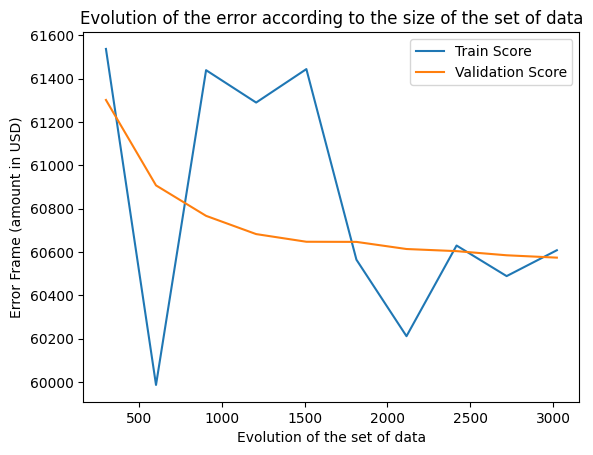

In [64]:
plt.plot(N, train_score.mean(axis=1), label="Train Score")
plt.plot(N, validation_score.mean(axis=1), label="Validation Score")
plt.title("Evolution of the error according to the size of the set of data")
plt.ylabel('Error Frame (amount in USD)')
plt.xlabel('Evolution of the set of data')
plt.legend()
plt.savefig('../illustrations/learning_curve.png')

### Comments on the results obtain

The last graph show clearly that more that wouldn't help the model to get better because the curve of the validation score does converge 
to a unique error.

### Demonstration

In [65]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Markdown

In [66]:
mapping_expertise={
    'Director': 4,
    'Expert': 3,
    'Intermediate': 2,
    'Junior':  1
}
mapping_experience={
    'Executive': 4,
    'Senior': 3,
    'Mid': 2,
    'Entry':  1
}
mapping_company={
    'small': 1,
    'medium': 2,
    'large': 3
}

model.predict(np.array([4, 4, 1]).reshape(1, 3))

array([117315.02564103])

In [68]:
@interact
def predict_survive_to_titanic (Expertise=['Director', 'Expert', 'Intermediate', 'Junior'], Experience=['Executive', 'Senior', 'Mid', 'Entry'], company=['small', 'medium', 'large']):
    print(mapping_expertise[Expertise], mapping_experience[Experience], mapping_company[company])
    tab=np.array([mapping_expertise[Expertise], mapping_experience[Experience], mapping_company[company]]).reshape(1, 3)
    salary_amount=model.predict(tab)[0]
    message=f'### <span style="color:#16a085">**Your salary will be around {int(salary_amount)} USD**</span>'
    # message=salary_amount
    display(Markdown(message))

interactive(children=(Dropdown(description='Expertise', options=('Director', 'Expert', 'Intermediate', 'Junior…